In [9]:
#BOSTON HOUSING 

In [205]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
DOWNLOAD_ROOT = "http://lib.stat.cmu.edu/datasets/boston"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT

In [61]:
# Creating a function to extract the data. 
# Now when you call fetch_housing_data(), it creates a datasets/housing directory in
# your workspace, downloads the housing.tgz file, and extracts the housing.csv file from
# it in this directory.

In [93]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    file_path = os.path.join(housing_path, "boston.txt")
    urllib.request.urlretrieve(housing_url, file_path)
    print(f"Dataset downloaded to {file_path}")
    return file_path

In [87]:
# loading the data using pandas
# returning a pandas DataFrame object containing all the data

In [125]:
def load_housing_data(housing_path=HOUSING_PATH):
    txt_path = os.path.join(housing_path, "boston.txt")

    with open(txt_path, 'r') as f:
        lines = f.readlines()
    raw_data = lines[22:]
    
    data=[]
    for i in range(0,len(raw_data),2):
        row1 = list(map(float, raw_data[i].strip().split()))
        row2 = list(map(float, raw_data[i+1].strip().split()))
        data.append(row1+row2)
    column_names = [
        "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", 
        "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
    ]
    df = pd.DataFrame(data, columns=column_names)
    return df

In [127]:
fetch_housing_data()
housing = load_housing_data()

Dataset downloaded to datasets/housing/boston.txt


In [128]:
print(housing.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [131]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
# Well, this works, but it is not perfect: if you run the program again, it will generate a
# different test set! Over time, you (or your Machine Learning algorithms) will get to
# see the whole dataset, which is what you want to avoid.
# One solution is to save the test set on the first run and then load it in subsequent
# runs. Another option is to set the random number generator’s seed (e.g., with np.ran
# dom.seed before calling np.random.permutation() so that it always generates
# the same shuffled indices.

In [197]:
def split_train_test(data,test_ratio):
    np.random.seed(7)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [199]:
train_set,test_set = split_train_test(housing,0.2)

In [201]:
train_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
26,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57,20.6
460,4.81213,0.0,18.10,0.0,0.713,6.701,90.0,2.5975,24.0,666.0,20.2,255.23,16.42,16.4
120,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0
346,0.06162,0.0,4.39,0.0,0.442,5.898,52.3,8.0136,3.0,352.0,18.8,364.61,12.67,17.2


In [216]:
housing = train_set.copy()

In [218]:
print(housing['MEDV'].describe())

count    405.000000
mean      22.507901
std        9.242181
min        5.000000
25%       16.800000
50%       20.900000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


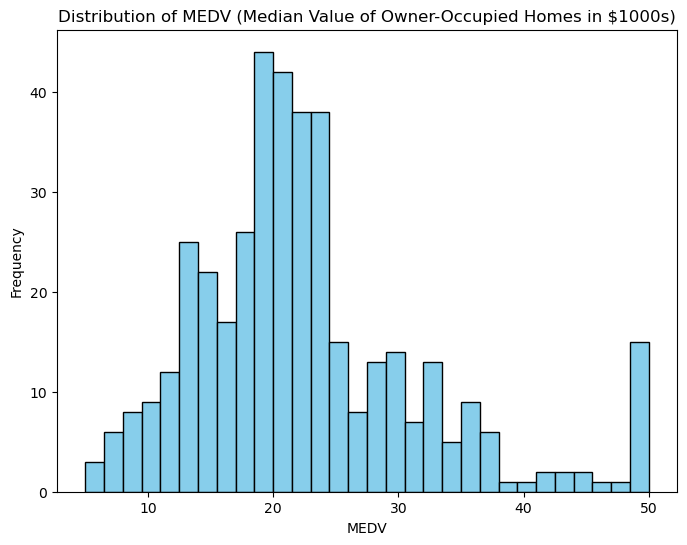

In [220]:
plt.figure(figsize=(8, 6))
plt.hist(housing['MEDV'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of MEDV (Median Value of Owner-Occupied Homes in $1000s)')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()